In [9]:
import matplotlib as plt

import skimage as sk
import numpy as np
import skimage.io as skio
import cv2
import math
import matplotlib.pyplot as plt
    
from numpy import pi, exp, sqrt
import matplotlib.pylab as plt

import pdb
import scipy
from scipy import signal

from skimage import color
from skimage import transform
from skimage import exposure
from skimage import feature
from scipy import ndimage as ndi
from numpy import linalg as LA
import itertools
import time
from scipy import signal
from scipy import sparse
from scipy.sparse import linalg
from numpy import ndarray
from skimage.draw import polygon

from scipy.spatial import Delaunay



scipy.spatial.qhull.Delaunay

In [10]:
# def createframes2(filename):
#     videoframes = []
#     frames= {}


#      count = 0
#     vidcap = cv2.VideoCapture( str(filename))
#     success,image = vidcap.read()
#     success = True
#     while success:
#       vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*100))    # added this line 
#       success,image = vidcap.read()
#       if success:
         
#          videoframes.append(image)
#          print ('Read a new frame: ', success)
         
#          cv2.imwrite( '' + str(filename) +""+ "_frame%d.jpg" % count, image)       
#          count = count + 1
#       else:
#          success = 0
#     frames['keyframes'] = videoframes
#     frames['filename']  = filename
#     return frames



In [5]:
createframes2("otter.mov")

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True


{'keyframes': [array([[[152, 135,  61],
          [150, 133,  59],
          [152, 135,  61],
          ...,
          [148, 131,  57],
          [145, 128,  54],
          [148, 131,  57]],
  
         [[148, 131,  57],
          [153, 136,  62],
          [148, 131,  57],
          ...,
          [150, 133,  59],
          [148, 131,  57],
          [148, 131,  57]],
  
         [[152, 135,  61],
          [151, 134,  60],
          [150, 133,  59],
          ...,
          [150, 133,  59],
          [148, 131,  57],
          [148, 131,  57]],
  
         ...,
  
         [[178, 161,  75],
          [178, 161,  75],
          [177, 160,  74],
          ...,
          [179, 159,  74],
          [177, 157,  72],
          [179, 159,  74]],
  
         [[178, 161,  75],
          [178, 161,  75],
          [178, 161,  75],
          ...,
          [177, 157,  72],
          [178, 158,  73],
          [177, 157,  72]],
  
         [[178, 161,  75],
          [178, 161,  75],
          [

In [16]:
frame0 = skio.imread("otter.mov_frame1.jpg")
edges = cv2.Canny(frame0,160,200)

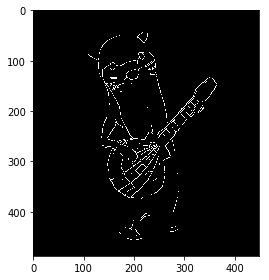

In [17]:
skio.imshow(edges)

In [21]:
frame0 = skio.imread("otter.mov_frame0.jpg")
edges = cv2.Canny(frame0,160,200)



In [22]:
gray = cv2.cvtColor(frame0, cv2.COLOR_BGR2GRAY)


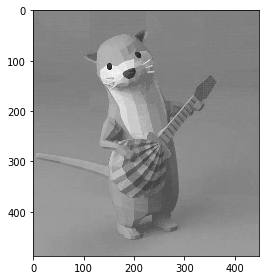

In [23]:
skio.imshow(gray)

In [24]:
def contrast_stretching(im):
	p2, p98 = np.percentile(im, (2, 98))
	img_rescale = exposure.rescale_intensity(im, in_range=(p2, p98))
	# pdb.set_trace()
	return img_rescale

In [25]:
contraststretched = contrast_stretching(gray)

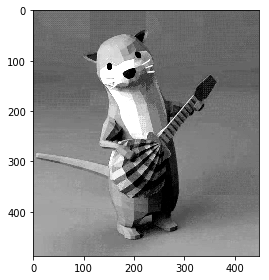

In [26]:
skio.imshow(contraststretched)

In [27]:
blurred = cv2.blur(contraststretched,(3,3))

In [35]:
edgy = cv2.Canny(blurred,100, 200)

In [29]:
from skimage.feature import corner_harris, peak_local_max


In [71]:
def get_harris_corners(im, edge_discard=20):
    """
    This function takes a b&w image and an optional amount to discard
    on the edge (default is 5 pixels), and finds all harris corners
    in the image. Harris corners near the edge are discarded and the
    coordinates of the remaining corners are returned. A 2d array (h)
    containing the h value of every pixel is also returned.

    h is the same shape as the original image, im.
    coords is 2 x n (ys, xs).
    """

    assert edge_discard >= 20

    # find harris corners
    h = corner_harris(im, method='eps', sigma=1)
    coords = peak_local_max(h, min_distance=6, indices=True)

    # discard points on edge
    edge = edge_discard  # pixels
    mask = (coords[:, 0] > edge) & \
           (coords[:, 0] < im.shape[0] - edge) & \
           (coords[:, 1] > edge) & \
           (coords[:, 1] < im.shape[1] - edge)
    coords = coords[mask].T
    return h, coords

In [426]:
harris = get_harris_corners(edgy)
from mpl_toolkits.mplot3d import Axes3D
import math

[193 183 221 210 171 272 287 196 259 252 181 283 172 223 210 234 201 265
 215 234 228 277 282 287 226 197 208 287 187 289 217 175 212 202 199 160
 289 288 237 153 223 188 248 288 287 214 183 137 156 206 287 239 286 112
 174 225 286  92 285 148  74  58 221 199  73 249 127 241 116 285  41 284
 207  32 260 190  99  94 215 230  83 182 246  68 271  67  62 284 160  61
  56 283  55  48  43  36 171  35  28  27 283 224 250 239 185 272 281 195
 178 154 208 281 136 221 181 209 202 252 266 224 170 233 188 153 145 137
 275 186 258 228 236 283 265 175 160 145 235 291 212 211 140 298 178 279
 233 162 232 150 232 231 304 272 174 286 208 151 292 228 312 324 263 262
 149 150 170 277 307 338 203 320 164 221 341 259 319 218 350 255 350 191
 166 210 249 357 357 143 326 167 187 160 362 338 245 205 189 159 132 211
 350 179 211 239 232 134 151 125 222 203 142 236 217 227 154 202 181 124
 231 212 107 192 124 213 223 205 172 187 135 215 203 148 158 192 173 225]


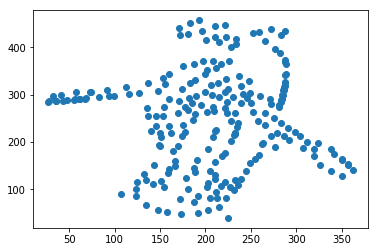

In [559]:

plt.scatter(harris[1][1], harris[1][0])
# Delaunay(harris[1])
points = np.array([[harris[1][1][i], harris[1][0][i]] for i in range(0, len(harris[1][0]) )])
# print(points)
print(points[:,0])
tri = Delaunay(points)



In [560]:
import random


In [561]:

randomzs= [math.floor(abs(math.sin(i/90)) * 100) for i in list(range(0, len(harris[1][0])))] 


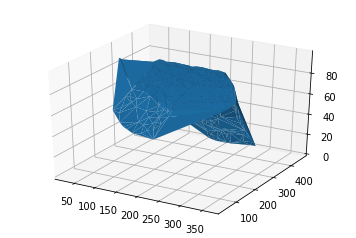

In [562]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(points[:,0], points[:,1], randomzs, linewidth=0.2, antialiased=True)
plt.show()

In [563]:
import csv

threedpoints = []

with open('meshpts_otter.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for ptIndex in range(0, len(points)):
      
        writer.writerow([points[ptIndex][0], points[ptIndex][1], randomzs[ptIndex]])
        threedpoints.append([points[ptIndex][0], points[ptIndex][1], randomzs[ptIndex]])

    file.close()
threedpoints

[[193, 457, 0],
 [183, 451, 1],
 [221, 446, 2],
 [210, 445, 3],
 [171, 441, 4],
 [272, 439, 5],
 [287, 434, 6],
 [196, 434, 7],
 [259, 433, 8],
 [252, 430, 9],
 [181, 428, 11],
 [283, 426, 12],
 [172, 425, 13],
 [223, 421, 14],
 [210, 421, 15],
 [234, 418, 16],
 [201, 416, 17],
 [265, 413, 18],
 [215, 411, 19],
 [234, 407, 20],
 [228, 400, 22],
 [277, 397, 23],
 [282, 387, 24],
 [287, 373, 25],
 [226, 372, 26],
 [197, 371, 27],
 [208, 370, 28],
 [287, 368, 29],
 [187, 365, 30],
 [289, 364, 31],
 [217, 364, 32],
 [175, 360, 33],
 [212, 356, 34],
 [202, 353, 35],
 [199, 344, 36],
 [160, 344, 37],
 [289, 343, 38],
 [288, 342, 39],
 [237, 339, 40],
 [153, 336, 41],
 [223, 334, 42],
 [188, 332, 43],
 [248, 329, 44],
 [288, 326, 45],
 [287, 325, 46],
 [214, 325, 47],
 [183, 325, 48],
 [137, 325, 49],
 [156, 322, 50],
 [206, 320, 51],
 [287, 318, 52],
 [239, 318, 53],
 [286, 317, 54],
 [112, 316, 55],
 [174, 313, 56],
 [225, 312, 57],
 [286, 310, 58],
 [92, 310, 59],
 [285, 309, 60],
 [148, 3

In [488]:
# for ptIndex in range(0, points.shape[0]):
                     
#     print(str(points[ptIndex][0]) + ", " + str(points[ptIndex][1]) + " , " + str(randomzs[ptIndex]))
    

In [489]:
# from stl import mesh


In [490]:
# from scipy.spatial import ConvexHull



In [491]:
# hull = ConvexHull(threedpoints)
# pts = np.array(threedpoints)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection="3d")

# # Plot defining corner points
# ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# # 1 simplice per triangle
# for s in hull.simplices:
#       # Here we cycle back to the first coordinate
#     ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], "r-")
    
# plt.show()

In [493]:
vertices = threedpoints
faces = tri.simplices

otter = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    
    otter.vectors[i][0] = threedpoints[f[0]]
    otter.vectors[i][1] = threedpoints[f[1]]
    otter.vectors[i][2] = threedpoints[f[2]]
        # Write the mesh to file "cube.stl"
otter.save('otter.stl')

In [ ]:
math.sin()

In [692]:
x = []
y = []
for i in range(-150, 150,10):
    y.append(math.cos(i/1000 * 3.14) * 700) 
    x.append(math.sin(i/1000 * 3.14) * 700) 
x.append(0)
y.append(0)
x = [math.floor(everyx) + 220 for everyx in x]
x.extend(points[:,0])
y = [math.floor(everyy) -600 for everyy in y]
y.extend(points[:,1] * -1)

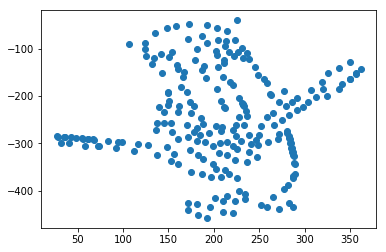

In [693]:
plt.scatter(points[:,0], points[:,1] * -1)


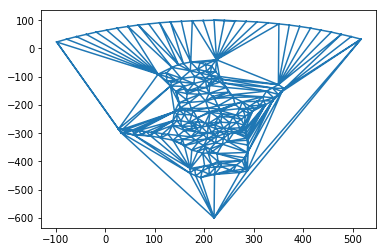

In [694]:

tri2 = Delaunay(list(zip(x,y)))

plt.triplot(x, y, tri2.simplices.copy())
plt.show()

In [699]:

randomzs2= [math.floor(abs(math.cos(i/90)) * 100) for i in list(range(0, len(x)))] 
randomzs2

[100,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 98,
 98,
 98,
 98,
 98,
 98,
 97,
 97,
 97,
 97,
 96,
 96,
 96,
 95,
 95,
 95,
 94,
 94,
 94,
 93,
 93,
 92,
 92,
 92,
 91,
 91,
 90,
 90,
 89,
 89,
 88,
 88,
 87,
 87,
 86,
 86,
 85,
 84,
 84,
 83,
 83,
 82,
 81,
 81,
 80,
 79,
 79,
 78,
 77,
 77,
 76,
 75,
 75,
 74,
 73,
 72,
 72,
 71,
 70,
 69,
 68,
 68,
 67,
 66,
 65,
 64,
 63,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 5,
 4,
 3,
 2,
 1,
 0,
 0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 57,
 58,
 59,
 60,
 61,
 62,
 6

In [700]:
threedpoints2 = []
for i in range(0, len(x)):
    threedpoints2.append([x[i], y[i], randomzs2[i]])

In [702]:
vertices = threedpoints2
faces = tri2.simplices

otter = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    
    otter.vectors[i][0] = threedpoints2[f[0]]
    otter.vectors[i][1] = threedpoints2[f[1]]
    otter.vectors[i][2] = threedpoints2[f[2]]
        # Write the mesh to file "cube.stl"
otter.save('otterfan0.stl')